In [1]:
# foia request data from propublica
# state of illinois gang database metadata - entries added per year
#    key for their database:
#   W = white or hispanic
#   B = black
#   A = 
#   U = 
#   I   

import pandas as pd

statewide_counts_path = 'data/18-1942-StatewideGangs-7_16_2018.xlsx'

gangDB = pd.read_excel(statewide_counts_path,sheet_name='gangDB')
print(gangDB)
print(gangDB.head)

    SEX RAC  EnterYear  Number
0     F   W       1993       2
1     F   B       1993       4
2     M   B       1993    1391
3     M   U       1993     197
4     M   W       1993     649
5     M   I       1993       1
6     F   B       1994      12
7     M   W       1994     636
8     F   W       1994       9
9     M   U       1994      83
10    M   A       1994       3
11    M   B       1994    1190
12    F   W       1995      17
13    M   B       1995    1239
14    F   U       1995      13
15    M   W       1995     527
16    M   A       1995       5
17    M   U       1995     722
18    F   B       1995      26
19    M   B       1996    1816
20    M   U       1996      97
21    F   U       1996       3
22    F   B       1996      52
23    M   A       1996      10
24    M   W       1996     642
25    F   W       1996      34
26    F   W       1997      29
27    M   U       1997      41
28    M   B       1997     945
29    F   B       1997      34
..   ..  ..        ...     ...
147   M 

In [2]:
# sanity check: a pandas dataframe is a list of columns:
for col in gangDB:
    print col 
    
print("")
  
for column, entries in gangDB.iteritems():   # better print out formatting
    print '{name}: {value}'.format(name=column, value=entries[0])

SEX
RAC
EnterYear
Number

SEX: F
RAC: W
EnterYear: 1993
Number: 2


In [3]:
# get the comprehensive list of races they track 

unique_identifiers = []

for entry in gangDB['RAC']:
    if not(entry in unique_identifiers):
        unique_identifiers.append(entry)

print(unique_identifiers)
    



[u'W', u'B', u'U', u'I', u'A']


In [4]:
# build a more convenient data structure for plotting
import numpy as np

N_races = len(unique_identifiers)
startYear = gangDB['EnterYear'].iloc[0]
endYear = gangDB['EnterYear'].iloc[-1]
N_years = endYear - startYear + 1
surveillanceTimeSeries = np.zeros((N_races, N_years)) # data structure for plotting entries by year for each race

year2idx = dict(zip(np.arange(startYear,endYear+1),np.arange(0,N_years))) # for convenient translation between year and index

for race_idx,race_ID in enumerate(unique_identifiers):
    for idx,val in enumerate(gangDB['RAC']):
        if race_ID==val:
            year = gangDB['EnterYear'].iloc[idx]
            yearIdx = year2idx[year]
            numEntries = gangDB['Number'].iloc[idx]
            surveillanceTimeSeries[race_idx][yearIdx] = numEntries

np.set_printoptions(precision = 3)
print(surveillanceTimeSeries)
 

[[  6.490e+02   9.000e+00   5.270e+02   3.400e+01   5.450e+02   6.140e+02
    5.190e+02   9.000e+00   4.090e+02   2.000e+01   1.400e+01   1.800e+01
    7.240e+02   8.570e+02   7.790e+02   3.500e+01   9.370e+02   8.270e+02
    3.200e+01   1.900e+01   4.490e+02   3.280e+02   3.710e+02   2.430e+02
    1.600e+01   2.000e+00]
 [  1.391e+03   1.190e+03   2.600e+01   5.200e+01   3.400e+01   1.112e+03
    1.800e+01   3.210e+02   2.000e+00   2.600e+01   2.120e+02   5.000e+00
    2.340e+02   3.300e+02   4.000e+00   3.810e+02   2.820e+02   3.000e+00
    1.000e+00   2.030e+02   1.480e+02   2.000e+00   1.760e+02   1.230e+02
    2.280e+02   1.440e+02]
 [  1.970e+02   8.300e+01   7.220e+02   3.000e+00   1.000e+00   1.430e+02
    7.900e+01   1.000e+00   2.900e+01   2.380e+02   3.300e+01   6.600e+01
    1.000e+00   4.000e+01   3.600e+01   2.000e+00   1.380e+02   7.200e+01
    3.200e+01   6.400e+01   1.000e+00   8.500e+01   6.800e+01   6.000e+00
    1.000e+00   5.000e+00]
 [  1.000e+00   0.000e+00   0.0

[u'W', u'B', u'U', u'I', u'A']


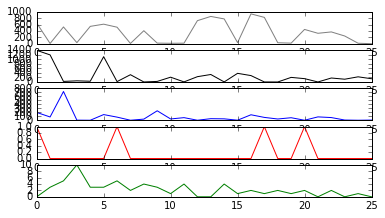

[u'W', u'B', u'U', u'I', u'A']


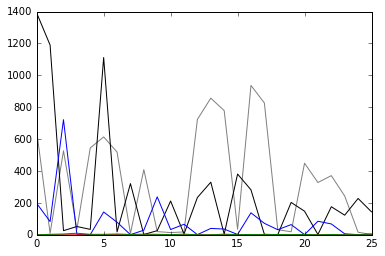

[u'W', u'B', u'U', u'I', u'A']


In [8]:
import matplotlib.pyplot as plt

print(unique_identifiers)
color_code = ['grey','black','blue','red','green']




# print direct number of entries for each race, seperate subplots
fig = plt.figure()

ax = []

for idx,ID in enumerate(unique_identifiers):
    ax.append(fig.add_subplot(6,1,idx+1))
    ax[idx].plot(surveillanceTimeSeries[idx][:],color=color_code[idx])

plt.show()
print(unique_identifiers)


# one subplot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for idx,ID in enumerate(unique_identifiers):
    ax.plot(surveillanceTimeSeries[idx][:],color=color_code[idx])

plt.show()
print(unique_identifiers)


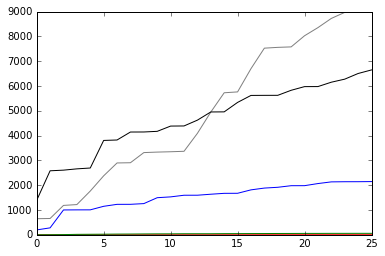

[u'W', u'B', u'U', u'I', u'A']


In [6]:
# print cumulative entries for each race

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for idx,ID in enumerate(unique_identifiers):
    yy = np.cumsum(surveillanceTimeSeries[idx][:])
    ax.plot(yy,color=color_code[idx])

plt.show()
print(unique_identifiers)



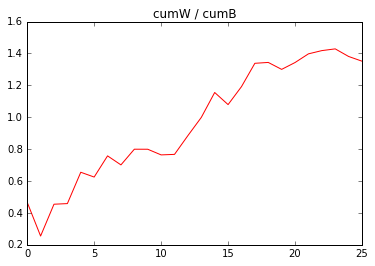

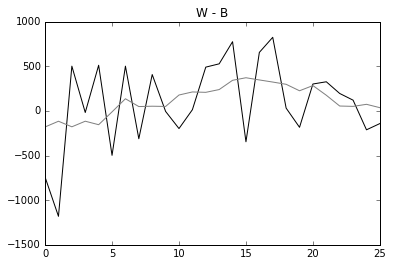

In [7]:
# ratio of W (hispanic + white) to B (african-american)


W_series = np.cumsum(surveillanceTimeSeries[0][:])
B_series = np.cumsum(surveillanceTimeSeries[1][:])

yy = []
for idx,W_val in enumerate(W_series):
    ratio = W_val / B_series[idx]
    yy.append(ratio)
fig = plt.figure()
plt.plot(yy,color = 'r')
plt.title('cumW / cumB')
plt.show()

W_series = surveillanceTimeSeries[0][:]
B_series = surveillanceTimeSeries[1][:]
yy = []
for idx,W_val in enumerate(W_series):
    difference = W_val - B_series[idx]
    yy.append(difference)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
    
fig = plt.figure()
plt.plot(yy,color = 'black')
plt.plot(smooth(yy,8),color='gray')
plt.title('W - B')
plt.show()

